In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt
from sklearn.svm import SVC
import numpy as np
import operator

data = load_breast_cancer()
X = data.data
Y = data.target

type(clf) = <class 'sklearn.model_selection._search.GridSearchCV'>
i = 0, clf.best_params_ = {'C': 1, 'kernel': 'linear'}, clf.best_score_ = 0.9630931458699473, nested_score = 0.9578255984789561
type(clf) = <class 'sklearn.model_selection._search.GridSearchCV'>
i = 1, clf.best_params_ = {'C': 10, 'kernel': 'linear'}, clf.best_score_ = 0.9630931458699473, nested_score = 0.9578266787658803
type(clf) = <class 'sklearn.model_selection._search.GridSearchCV'>
i = 2, clf.best_params_ = {'C': 10, 'kernel': 'linear'}, clf.best_score_ = 0.9578207381370826, nested_score = 0.9595810647307925
type(clf) = <class 'sklearn.model_selection._search.GridSearchCV'>
i = 3, clf.best_params_ = {'C': 10, 'kernel': 'linear'}, clf.best_score_ = 0.9595782073813708, nested_score = 0.9613041223749027
type(clf) = <class 'sklearn.model_selection._search.GridSearchCV'>
i = 4, clf.best_params_ = {'C': 10, 'kernel': 'linear'}, clf.best_score_ = 0.961335676625659, nested_score = 0.9543805634776596
type(clf) = <class 'sk

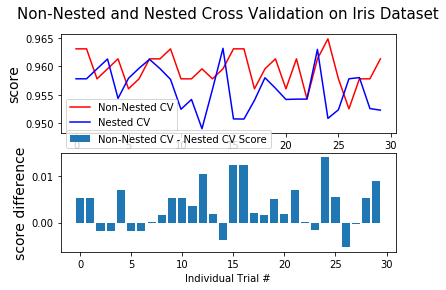

In [2]:
%matplotlib inline

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# Number of random trials
NUM_TRIALS = 30

# We will use a Support Vector Classifier with "rbf" kernel
svm = SVC()

# Arrays to store scores
non_nested_scores = np.zeros(NUM_TRIALS)
nested_scores = np.zeros(NUM_TRIALS)

param_dict = {}
# Loop for each trial
for i in range(NUM_TRIALS):

    # Choose cross-validation techniques for the inner and outer loops,
    # independently of the dataset.
    # E.g "LabelKFold", "LeaveOneOut", "LeaveOneLabelOut", etc.
    inner_cv = StratifiedKFold(n_splits=10, random_state=i, shuffle=True)
    outer_cv = StratifiedKFold(n_splits=10, random_state=i+1, shuffle=True)

    # Non_nested parameter search and scoring
    clf = GridSearchCV(estimator=svm, param_grid=tuned_parameters, cv=inner_cv, scoring = 'accuracy')
    clf.fit(X, Y)
    non_nested_scores[i] = clf.best_score_
    print(f'type(clf) = {type(clf)}')
    print(f'i = {i}, clf.best_params_ = {clf.best_params_}, clf.best_score_ = {clf.best_score_}', end='')
    best_params = str(clf.best_params_)
      
    # Nested CV with parameter optimization
    nested_score = cross_val_score(clf.best_estimator_, X=X, y=Y, cv=outer_cv, scoring = 'accuracy')
    nested_scores[i] = nested_score.mean()

    # Record the parameter count
    param_dict[best_params] = nested_scores[i]
    print(f', nested_score = {nested_score.mean()}')

print(f"=============================")
sorted_param_dict = sorted(param_dict.items(), key=operator.itemgetter(1))
for x in sorted_param_dict:
    print(f'{x[0]}, num = {x[1]}')

print(f"=============================")
print(f'mean of nested_score = {nested_score.mean()}')
print(f'mean of non_nested_scores = {non_nested_scores.mean()}')
score_difference = non_nested_scores - nested_scores

print("Average difference of {0:6f} with std. dev. of {1:6f}."
      .format(score_difference.mean(), score_difference.std()))

# Plot scores on each trial for nested and non-nested CV
plt.figure()
plt.subplot(211)
non_nested_scores_line, = plt.plot(non_nested_scores, color='r')
nested_line, = plt.plot(nested_scores, color='b')
plt.ylabel("score", fontsize="14")
plt.legend([non_nested_scores_line, nested_line],
           ["Non-Nested CV", "Nested CV"],
           bbox_to_anchor=(0, .4, .5, 0))
plt.title("Non-Nested and Nested Cross Validation on Iris Dataset",
          x=.5, y=1.1, fontsize="15")

# Plot bar chart of the difference.
plt.subplot(212)
difference_plot = plt.bar(range(NUM_TRIALS), score_difference)
plt.xlabel("Individual Trial #")
plt.legend([difference_plot],
           ["Non-Nested CV - Nested CV Score"],
           bbox_to_anchor=(0, 1, .8, 0))
plt.ylabel("score difference", fontsize="14")

plt.show()